In [1]:
###First, need to load in necessary packages
import pandas as pd
from upsetplot import from_contents
from upsetplot import UpSet
from matplotlib import pyplot as plt
from upsetplot import generate_counts

In [2]:
###Loading in file. This contains the groups from our ReDU co-analysis as
###individual columns. Each column is filled in with the list of metabolite
###features found in each group.
df = pd.read_csv("Upset_file_for_ReDU_Coanalysis_of_MS_types.csv")
df.head()

,Q_Exactive,Impact_MS,maXis,Our_samples
0,3,114.0,114.0,3.0
1,5,224.0,116.0,5.0
2,8,312.0,127.0,25.0
3,20,387.0,196.0,193.0
4,25,388.0,383.0,464.0


In [3]:
###Pulling in the file as a list
lists_of_filename=["Upset_file_for_ReDU_Coanalysis_of_MS_types.csv"]

In [4]:
###Providing list of titles for graphs and file names
list_of_types=["ReDU Feces Co-Analysis with MS Instruments"]

In [5]:
###Creating a counter for a loop
counter=0

In [6]:
###Running this loop for all files (if multiple are provided)
for file in lists_of_filename:
    df=pd.read_csv(file)

In [7]:
###Creating input lists for analysis. This will also drop NAs and
###duplicates that might appear when uploading. Each column will also
###be made into a list.
Q_Exactive = df['Q_Exactive'].dropna().drop_duplicates().tolist()
Impact_MS = df['Impact_MS'].dropna().drop_duplicates().tolist()
maXis = df['maXis'].dropna().drop_duplicates().tolist()
Our_samples = df['Our_samples'].dropna().drop_duplicates().tolist()

In [8]:
###Creating the combined dataset as a reference for names, tied to the
###lists above.
MS = from_contents({'Q_Exactive': Q_Exactive,
                   'Impact_MS': Impact_MS,
                   'maXis': maXis,
                   'Our_samples': Our_samples})

In [9]:
###Parameters for UpSet plot. Can add other parameters like coloring specific overlaps if desired
upset_plt=UpSet(MS, sort_categories_by=None, sort_by='cardinality',
               min_subset_size=40, facecolor='black', other_dots_color=0.05,
               shading_color=0.05, with_lines=True, element_size=32,
               show_counts=True, show_percentages=False)

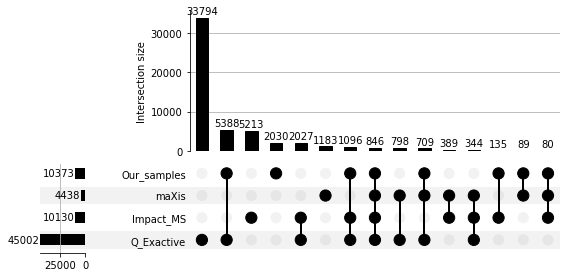

In [10]:
###Creating and saving the plot
upset_plt.plot()
plt.savefig(list_of_types[counter]+"upset_bw.jpeg", bbox_inches="tight")